In [1]:


ini_date = '12/08/22 13:00:00'
end_date = '13/08/22 16:45:00'

time_step=15

sensors=["clutery", "dishwasher","fridge","microwave"]
tags=["1", "2"]

colors={}
colors["1"]="red"
colors["2"]="blue"


In [2]:
import numpy as np
from pandas import read_csv    

import time

from datetime import datetime

def day_time(ti):
    return int((int)(ti/(60*60*24)))

t0 = (int)(datetime.strptime(ini_date, '%d/%m/%y %H:%M:%S').timestamp())
print ("Init date is", t0, "day:",day_time(t0))

tN = (int)(datetime.strptime(end_date, '%d/%m/%y %H:%M:%S').timestamp())
print ("Init date is", tN, "day:",day_time(tN))

def relT(ti):
    return (int)((ti-t0)/time_step)

def absT(tt):
    return (int)(tt*time_step+t0)

nT=(int)(round((tN-t0-1)/time_step))
print(nT)

Init date is 1660302000 day: 19216
Init date is 1660401900 day: 19217
6660


In [3]:
S=np.zeros((len(sensors), nT))
for i,sensor in enumerate(sensors):
    series=read_csv("./time-data/"+sensor+".tsv", sep="\t",parse_dates=True,header=None)
    S[i]=  np.array(series.values[:,[1]]).flatten()  
    print(S[i].shape)
print(S.shape)

(6660,)
(6660,)
(6660,)
(6660,)
(4, 6660)


In [4]:
def intervals(s):
    ret=[]
    lastV=0
    lastI=-1
    for t in range(0,len(s)):
        if(lastV==1 and s[t]==0):
            ret.append((lastI,t-1))
        if(lastV==0 and s[t]==1):
            lastI=t
        lastV=s[t]
    return ret

           

In [5]:
ftw_f1=[1,1,1,1,0.8,0.6,0.4,0.2]
def FTW_f(s,ftw_f):
    s2=np.zeros(len(s))
    for t in range(0,nT):
        s2[t]=0
        for incT in range(0, len(ftw_f)):
            if(t+incT>=(len(s))):
                continue
            s2[t]=max(s2[t],s[t+incT] * ftw_f[incT])
    return s2
def FTW_p(s,ftw_f):
    s2=np.zeros(len(s))
    for t in range(0,nT):
        s2[t]=0
        for incT in range(0, len(ftw_f)):
            if(t-incT<0):
                continue
            s2[t]=max(s2[t],s[t-incT] * ftw_f[incT])
    return s2

def FTW_sensor(s,ftw_f):
    sp=FTW_p(s,ftw_f)
    sf=FTW_f(s,ftw_f)
    s2=np.zeros(len(s))
    for t in range(0,nT):
        s2[t]=min(sp[t],sf[t])
    return s2

ix=range(5110,5130)
s1=S[0]
print(s1[ix])
s2=FTW_f(s1,ftw_f1)
print(s2[ix])
s2=FTW_p(s1,ftw_f1)
print(s2[ix])

s2=FTW_sensor(s1,ftw_f1)
print(s2[ix])

[0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0.8 1.  1.  1.  1.  1.  1.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0. ]
[0.  0.  0.  0.  1.  1.  1.  1.  1.  1.  1.  1.  0.8 0.6 0.4 0.2 0.  0.
 0.  0. ]
[0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


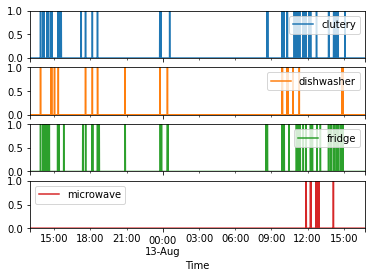

In [6]:
import pandas as pd


def printSensorMatrix(Ss):
    df = pd.DataFrame()
    ts=[]
    for t in range(t0,tN,time_step):
        ts.append(datetime.fromtimestamp( t))

    df['Time']=ts
    for ix,sensor in enumerate(sensors):
        df[sensor]=Ss[ix]
    df.plot(x="Time",y=sensors,subplots=True, legend=True, ylim=(0,1))    
    
printSensorMatrix(S)    

In [7]:
for i,sensor in enumerate(sensors):
    print(i,sensor)
    print("number of time intervals", len(intervals(S[i])))
   
     

0 clutery
number of time intervals 68
1 dishwasher
number of time intervals 22
2 fridge
number of time intervals 79
3 microwave
number of time intervals 9


In [8]:
f = open("./time-data/S.matrix.tsv", "w")
f.write("TIME")
for i,sensor in enumerate(sensors):
    f.write("\t"+sensor)
f.write("\n")
for t in range(0,nT):
    tt=absT(t)
    f.write(datetime.fromtimestamp(tt).strftime("%Y-%m-%d %H:%M:%S"))
    for i,sensor in enumerate(sensors):
        f.write("\t"+str(S[i][t]))
    f.write("\n")
f.close()

In [9]:
user_location={}
for tag in tags:
    user_location[tag]=[]
    series=read_csv("./time-data/"+tag+".tsv", sep="\t",parse_dates=True,header=None)
    user_location[tag]=  np.array(series.values[:,[1,2,3,4,5]])  
    print(user_location[tag].shape)
    
print(user_location["1"])

(6660, 5)
(6660, 5)
[['None' 'None' 'None' 'None' 'None']
 ['None' 'None' 'None' 'None' 'None']
 ['None' 'None' 'None' 'None' 'None']
 ...
 ['None' 'None' 'None' 'None' 'None']
 ['None' 'None' 'None' 'None' 'None']
 ['None' 'None' 'None' 'None' 'None']]


In [10]:
series=read_csv("./time-data/1.tsv", sep="\t",parse_dates=True,header=None)
ts=  np.array(series.values[:,[5]])  
print(ts)
print(ts.shape[0])

[['None']
 ['None']
 ['None']
 ...
 ['None']
 ['None']
 ['None']]
6660


In [11]:
series=read_csv("./sensors-location.tsv", sep="\t",header=None)
print(series.values)
sensor_location={}
for d in series.values:
    for s in d[0].split(","):
        sensor_location[s]=[]
for d in series.values:
    for s in d[0].split(","):
        sensor_location[s].append([float(d[1]),float(d[2]),float(d[3]),float(d[4]),float(d[5])])
    
print(sensor_location)

[['clutery' 3010.0 -3460.0 4238.5 -2182.5 1.0]
 ['dishwasher' 1930.0 -3060.0 3280.0 -2250.0 1.0]
 ['fridge' 3550.0 -5179.5 4981.0 -3870.0 1.0]
 ['microwave' 3347.5 -4275.0 4765.0 -3060.0 1.0]
 ['oven' 3347.5 -4275.0 4765.0 -3060.0 1.0]
 ['clutery,dishwasher,fridge,microwave,oven' 1530.0 -4500.0 3880.0
  -2870.0 0.5]]
{'clutery': [[3010.0, -3460.0, 4238.5, -2182.5, 1.0], [1530.0, -4500.0, 3880.0, -2870.0, 0.5]], 'dishwasher': [[1930.0, -3060.0, 3280.0, -2250.0, 1.0], [1530.0, -4500.0, 3880.0, -2870.0, 0.5]], 'fridge': [[3550.0, -5179.5, 4981.0, -3870.0, 1.0], [1530.0, -4500.0, 3880.0, -2870.0, 0.5]], 'microwave': [[3347.5, -4275.0, 4765.0, -3060.0, 1.0], [1530.0, -4500.0, 3880.0, -2870.0, 0.5]], 'oven': [[3347.5, -4275.0, 4765.0, -3060.0, 1.0], [1530.0, -4500.0, 3880.0, -2870.0, 0.5]]}


In [12]:
 def get_iou(bb1, bb2):
    assert bb1[0] <= bb1[2]
    assert bb1[1] <= bb1[3]
    assert bb2[0] <= bb2[2]
    assert bb2[1] <= bb2[3]

    # determine the coordinates of the intersection rectangle
    x_left = max(bb1[0], bb2[0])
    y_top = max(bb1[1], bb2[1])
    x_right = min(bb1[2], bb2[2])
    y_bottom = min(bb1[3], bb2[3])

    #print(" iou:",[x_left,y_top,x_right,y_bottom])
    if x_right < x_left or y_bottom < y_top:
        return 0.0

    # The intersection of two axis-aligned bounding boxes is always an
    # axis-aligned bounding box
    intersection_area = (x_right - x_left) * (y_bottom - y_top)

    
    # compute the area of both AABBs
    bb1_area = (bb1[2] - bb1[0]) * (bb1[3] - bb1[1])
    bb2_area = (bb2[2] - bb2[0]) * (bb2[3] - bb2[1])

    # compute the intersection over union by taking the intersection
    # area and dividing it by the sum of prediction + ground-truth
    # areas - the interesection area
    #iou = intersection_area / float(bb1_area + bb2_area - intersection_area)
    #print(" intersection_area/bb1_area:",intersection_area,bb1_area)
    if intersection_area==0 or bb1_area==0:
        return 1
    iou = intersection_area / float(bb1_area)
    assert iou >= 0.0
    assert iou <= 1.0
    return iou
get_iou([22, 25, 22, 26],[10, 20, 30, 50] )

1

In [13]:
def getIoSUW(t,sensor, tag):
    iou=0
    if( 'None' in user_location[tag][t]):
        return 0

    user_location[tag][t]=user_location[tag][t].astype(np.float)
    x1,y1,x2,y2,w=user_location[tag][t][0],user_location[tag][t][1],user_location[tag][t][2],user_location[tag][t][3],user_location[tag][t][4] 
    for sl in sensor_location[sensor]:
        x1o,y1o,x2o,y2o,wo=sl[0],sl[1],sl[2],sl[3],sl[4]

        viou=get_iou([x1,y1,x2,y2],[x1o,y1o,x2o,y2o])
        #print("\t \t", datetime.fromtimestamp(absT(t)).strftime("%Y-%m-%d %H:%M:%S"), " IoU:",tag,viou)
        #print("\t \t ",w,wo,"F(IoU):",tag,viou*w*wo)
        iou=max(iou,viou*w*wo)
            
    #print("iou",iou)
    return iou

In [14]:
def Q(x,l,u):
    if(x<=l):
        return 0
    if(x>=u):
        return 1
    return (x-l)/(u-l)
Q(0.8,0.25,0.75)

1

In [15]:
I=np.zeros((len(tags),len(sensors), nT))
cT=0
cA=0
for i,sensor in enumerate(sensors):
    print("Evaluating sensor activation of ",sensor)
    for ii in intervals(S[i]):
        #print("\t Interval",ii, datetime.fromtimestamp(absT(ii[0])).strftime("%Y-%m-%d %H:%M:%S"), datetime.fromtimestamp(absT(ii[1])).strftime("%Y-%m-%d %H:%M:%S"))
        for u,tag in enumerate(tags):
            wUS=np.zeros(ii[1]-ii[0]+1)
            for t in range(ii[0],ii[1]+1):
                j=t-ii[0]
                wUS[j]=getIoSUW(t,sensor,tag)
            wSA=S[i][ii[0]:ii[1]+1]
            wUI=np.dot(wSA,wUS)/float(np.sum(wSA))
            
            #print("\t \t  ",ii," User ",tag," wUI:",wUI, "Q(wUI):",Q(wUI,0.1,0.5))
            I[u][i][range(ii[0],ii[1]+1)]=Q(wUI,0.1,0.5)
            

Evaluating sensor activation of  clutery
Evaluating sensor activation of  dishwasher
Evaluating sensor activation of  fridge
Evaluating sensor activation of  microwave


In [16]:
for u,tag in enumerate(tags):
    f = open("./time-data/"+tag+".matrix.tsv", "w")
    f.write("TIME")
    for i,sensor in enumerate(sensors):
        f.write("\t"+sensor)
    f.write("\n")
    for t in range(0,nT):
        tt=absT(t)
        f.write(datetime.fromtimestamp(tt).strftime("%Y-%m-%d %H:%M:%S"))
        for i,sensor in enumerate(sensors):
            f.write("\t"+str(I[u][i][t]))
        f.write("\n")
    f.close()

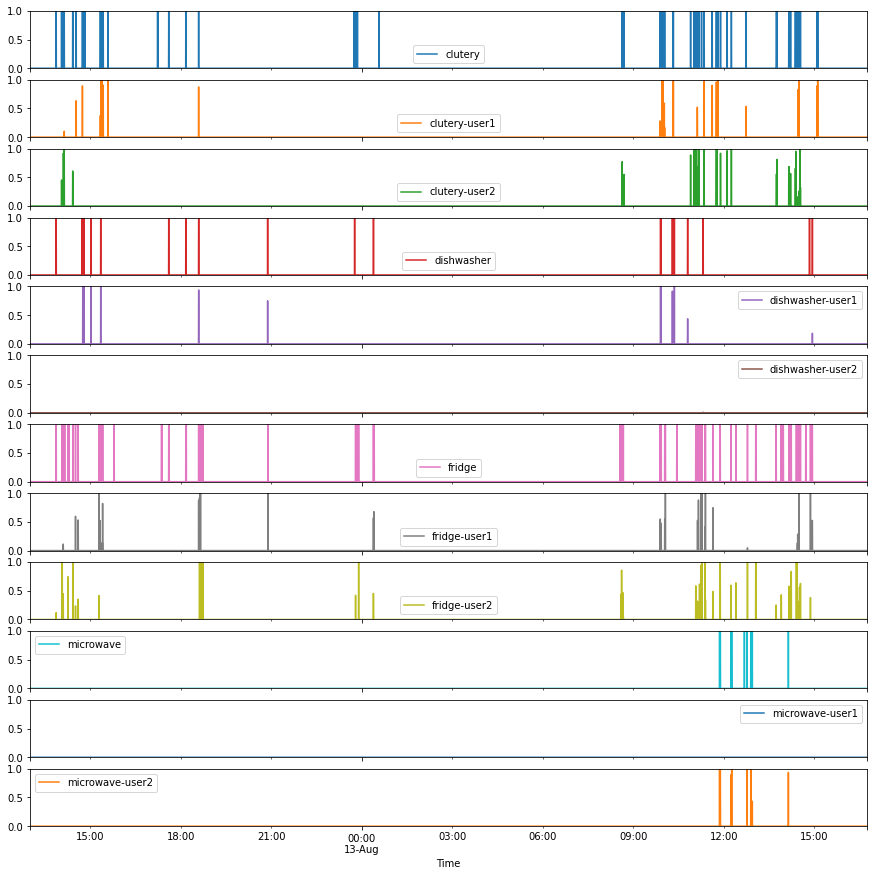

In [17]:
def prinUserSensorMatrix(I,S):
    df = pd.DataFrame()
    ts=[]
    for t in range(t0,tN,time_step):
        ts.append(datetime.fromtimestamp( t))

    df['Time']=ts
    ls=[]
    for ix,sensor in enumerate(sensors):
        df[sensor]=S[ix]
        ls.append(sensor)
        for ux,tag in enumerate(tags):
            df[sensor+"-user"+tag]=I[ux][ix]
            ls.append(sensor+"-user"+tag)
    df.plot(x="Time",y=ls,subplots=True, legend=True, ylim=(0,1), figsize=(15,15))    
    
prinUserSensorMatrix(I,S)